<a href="https://colab.research.google.com/github/wy-ei/notebook/blob/master/machine_learning/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


# from keras.utils.np_utils import to_categorical
# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 149us/step - loss: 2.4983 - acc: 0.5727 - val_loss: 1.7686 - val_acc: 0.6660
Epoch 2/8
7982/7982 [==============================] - 1s 138us/step - loss: 1.4390 - acc: 0.7253 - val_loss: 1.3275 - val_acc: 0.7250
Epoch 3/8
7982/7982 [==============================] - 1s 143us/step - loss: 1.0475 - acc: 0.7884 - val_loss: 1.1264 - val_acc: 0.7700
Epoch 4/8
7982/7982 [==============================] - 1s 141us/step - loss: 0.8164 - acc: 0.8363 - val_loss: 1.0146 - val_acc: 0.8000
Epoch 5/8
7982/7982 [==============================] - 1s 142us/step - loss: 0.6541 - acc: 0.8735 - val_loss: 0.9382 - val_acc: 0.8070
Epoch 6/8
7982/7982 [==============================] - 1s 141us/step - loss: 0.5338 - acc: 0.8971 - val_loss: 0.8913 - val_acc: 0.8150
Epoch 7/8
7982/7982 [==============================] - 1s 141us/step - loss: 0.4402 - acc: 0.9134 - val_loss: 0.8639 - val_acc: 0.8170
Epoch 8

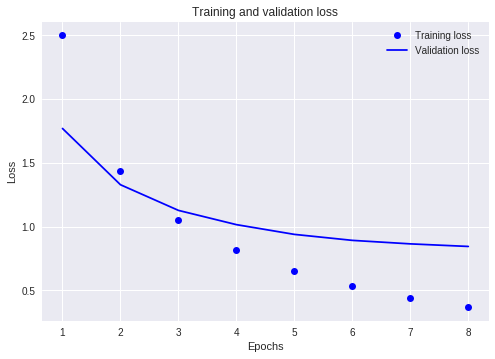

In [23]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

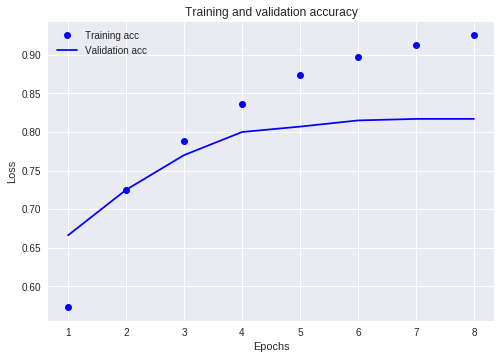

In [24]:
plt.clf() # clear figure
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
results = model.evaluate(x_test, one_hot_test_labels)

results

2246/2246 [==============================] - 0s 97us/step


[0.907875551035228, 0.7983081032947462]

## 总结

- 对于N分类任务，输出应该有 N 维，采用 `softmax` 得到属于各个类别的概率
- 对于对分类的标签，可以采用 one-hot 进行编码，损失函数使用 `categorical_crossentropy`
- 在隐层中不应该使用输入少于 N 的隐层